In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Load the dataset
a1 = pd.read_excel("C:\\Users\\Yash mishra\\Desktop\\PROJECTS\\Credit Risk Modelling\\Material_Session 04\\case_study1.xlsx")
a2 = pd.read_excel("C:\\Users\\Yash mishra\\Desktop\\PROJECTS\\Credit Risk Modelling\\Material_Session 04\\case_study2.xlsx")

In [3]:
df1 = a1.copy()
df2 = a2.copy()

In [4]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [5]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [6]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [7]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

In [8]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [9]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [10]:
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51296 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51296 non-null  int64  
 1   Total_TL              51296 non-null  int64  
 2   Tot_Closed_TL         51296 non-null  int64  
 3   Tot_Active_TL         51296 non-null  int64  
 4   Total_TL_opened_L6M   51296 non-null  int64  
 5   Tot_TL_closed_L6M     51296 non-null  int64  
 6   pct_tl_open_L6M       51296 non-null  float64
 7   pct_tl_closed_L6M     51296 non-null  float64
 8   pct_active_tl         51296 non-null  float64
 9   pct_closed_tl         51296 non-null  float64
 10  Total_TL_opened_L12M  51296 non-null  int64  
 11  Tot_TL_closed_L12M    51296 non-null  int64  
 12  pct_tl_open_L12M      51296 non-null  float64
 13  pct_tl_closed_L12M    51296 non-null  float64
 14  Tot_Missed_Pmnt       51296 non-null  int64  
 15  Auto_TL               51

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42066 entries, 0 to 51335
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42066 non-null  int64  
 1   time_since_recent_payment   42066 non-null  int64  
 2   num_times_delinquent        42066 non-null  int64  
 3   max_recent_level_of_deliq   42066 non-null  int64  
 4   num_deliq_6mts              42066 non-null  int64  
 5   num_deliq_12mts             42066 non-null  int64  
 6   num_deliq_6_12mts           42066 non-null  int64  
 7   num_times_30p_dpd           42066 non-null  int64  
 8   num_times_60p_dpd           42066 non-null  int64  
 9   num_std                     42066 non-null  int64  
 10  num_std_6mts                42066 non-null  int64  
 11  num_std_12mts               42066 non-null  int64  
 12  num_sub                     42066 non-null  int64  
 13  num_sub_6mts                42066 no

In [13]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

PROSPECTID


In [14]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [15]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [16]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [17]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


### Since all the categorical features have pval <=0.05, we will accept all

In [18]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [19]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [20]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [21]:
for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

0 --- inf
0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735
2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.0996533816467355
3 --- 5.5813520096427585
4 --- 1.985584353098778
5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.064658415523423
8 --- 2.898639771299252
9 --- 4.377876915347322
10 --- 2.2078535836958433
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438
15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190323
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.623397553527229
21 --- 2.2959970812106167
22 --- 7.360578319196446
22 --- 2.1602387773102554
23 --- 2.8686288267891467
2

In [22]:
# check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [23]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [24]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [25]:
df.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3


In [26]:
## Independent and dependent features
X = df.drop(labels=['Approved_Flag'],axis=1)
Y = df[['Approved_Flag']]

In [27]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [28]:
categorical_cols

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [29]:
numerical_cols

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag'],
      dtype='object')

In [30]:
# Separate education for ordinal encoding
education_col = ['EDUCATION']
other_cat_cols = [col for col in categorical_cols if col != 'EDUCATION']

In [31]:
education_order = {
    'SSC': 1,
    '12TH': 2,
    'GRADUATE': 3,
    'UNDER GRADUATE': 3,
    'POST-GRADUATE': 4,
    'OTHERS': 1,
    'PROFESSIONAL': 3
}

# You can use this dictionary in your preprocessing pipeline

In [33]:
# Create an OrdinalEncoder object
oe = OrdinalEncoder(categories=[['P4', 'P3', 'P2', 'P1']], dtype=int)

# Fit the encoder on Y and transform Y
Y = oe.fit_transform(Y[['Approved_Flag']])

In [32]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [34]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ]
)

# Education Pipeline (Ordinal Encoding with specific order)
education_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder(categories=[list(education_order.keys())], dtype=int))
    ]
)

# Other Categorical Pipeline (One-Hot Encoding)
cat_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)),
    ]
)

# Correct the ColumnTransformer setup
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, list(numerical_cols)),
    ('education_pipeline', education_pipeline, education_col),  # Changed from education_order to education_col
    ('cat_pipeline', cat_pipeline, list(other_cat_cols))
])

In [35]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pct_tl_open_L6M', 'pct_tl_closed_L6M',
                                  'Tot_TL_closed_L12M', 'pct_tl_closed_L12M',
                                  'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL',
                                  'PL_TL', 'Secured_TL', 'Unsecured_TL',
                                  'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
                                  'time_since_rec...
                                                  OrdinalEncoder(categories=[['SSC',
                                                                              '12TH',
                                                                              'GRADUATE',
                                                                              'UNDER '
                                                                              'GRADUATE',
                                                                              'POST-GRADUATE',
                                                                              'OTHERS',
                                                                              'PROFESSIONAL']],
                                                                 dtype=<class 'int'>))]),
                                 ['EDUCATION']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['MARITALSTATUS', 'GENDER', 'last_prod_enq2',
                                  'first_prod_enq2'])])

In [36]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [37]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [38]:
X_train.head()

,num_pipeline__pct_tl_open_L6M,num_pipeline__pct_tl_closed_L6M,num_pipeline__Tot_TL_closed_L12M,num_pipeline__pct_tl_closed_L12M,num_pipeline__Tot_Missed_Pmnt,num_pipeline__CC_TL,num_pipeline__Home_TL,num_pipeline__PL_TL,num_pipeline__Secured_TL,num_pipeline__Unsecured_TL,...,cat_pipeline__last_prod_enq2_CC,cat_pipeline__last_prod_enq2_ConsumerLoan,cat_pipeline__last_prod_enq2_HL,cat_pipeline__last_prod_enq2_PL,cat_pipeline__last_prod_enq2_others,cat_pipeline__first_prod_enq2_CC,cat_pipeline__first_prod_enq2_ConsumerLoan,cat_pipeline__first_prod_enq2_HL,cat_pipeline__first_prod_enq2_PL,cat_pipeline__first_prod_enq2_others
0,-0.644566,-0.460806,-0.539489,-0.618605,-0.470011,-0.271976,-0.212236,-0.355777,-0.451819,-0.393590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.529199,-0.460806,-0.539489,-0.618605,-0.470011,-0.271976,-0.212236,-0.355777,4.161853,-0.393590,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.644566,-0.460806,-0.539489,-0.618605,-0.470011,-0.271976,-0.212236,-0.355777,-0.451819,-0.393590,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.644566,-0.260880,0.115713,-0.455737,-0.470011,24.485404,2.638621,7.206981,0.009548,5.520151,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2.960670,0.334136,0.115713,0.028989,0.419614,-0.271976,-0.212236,1.805011,0.009548,0.197784,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SupportVectorClassifier':SVC(),
    'NaiveBayes':GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostRegressor':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [41]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    return acc

In [42]:
trained_model_list=[]
model_list=[]
acc=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy score",accuracy)

    acc.append(accuracy)
    
    print('='*35)
    print('\n')
best_model_index = acc.index(max(acc))
best_model_name = model_list[best_model_index]
best_model = list(models.values())[best_model_index]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {max(acc)}")

LogisticRegression
Model Training Performance
Accuracy score 0.745958795562599


DecisionTreeClassifier
Model Training Performance
Accuracy score 0.6935023771790808


SupportVectorClassifier
Model Training Performance
Accuracy score 0.7548335974643423


NaiveBayes
Model Training Performance
Accuracy score 0.5200475435816165


RandomForestClassifier
Model Training Performance
Accuracy score 0.7650554675118859


AdaBoostRegressor
Model Training Performance
Accuracy score 0.7434231378763867


XGBClassifier
Model Training Performance
Accuracy score 0.770364500792393


Best Model: XGBClassifier
Best Accuracy: 0.770364500792393


In [43]:
# Initialize the classifier
classifier = XGBClassifier(random_state=42)

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

In [45]:
# Set up the grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

# Fit the grid search
grid_search.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.732 total time=   0.5s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.719 total time=   0.5s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.728 total time=   0.5s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.743 total time=   1.2s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.734 total time=   1.1s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.744 total time=   1.3s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300;, score=0.746 total time=   1.9s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, min_chi

[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200;, score=0.770 total time=   3.3s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200;, score=0.770 total time=   3.3s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200;, score=0.776 total time=   3.8s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300;, score=0.772 total time=   5.0s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300;, score=0.772 total time=   5.4s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300;, score=0.779 total time=   5.1s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100;, score=0.767 total time=   1.7s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100;, score=0.763 total time=   1.6s


[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.775 total time=   2.6s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.777 total time=   2.8s
[CV 3/3] END gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.782 total time=   2.6s
[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.772 total time=   1.5s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.777 total time=   1.5s
[CV 3/3] END gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.780 total time=   1.5s
[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200;, score=0.774 total time=   3.1s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200;, score=0.775 total time=   2.8s
[CV 3/3]

[CV 2/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100;, score=0.775 total time=   0.9s
[CV 3/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100;, score=0.778 total time=   0.9s
[CV 1/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200;, score=0.771 total time=   2.0s
[CV 2/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200;, score=0.772 total time=   2.2s
[CV 3/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200;, score=0.778 total time=   1.8s
[CV 1/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300;, score=0.770 total time=   2.8s
[CV 2/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300;, score=0.770 total time=   2.7s
[CV 3/3] END gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300;, score=0.773 total time=   3.0s
[CV 1/3]

[CV 2/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200;, score=0.733 total time=   1.4s
[CV 3/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200;, score=0.744 total time=   1.4s
[CV 1/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300;, score=0.746 total time=   2.0s
[CV 2/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300;, score=0.740 total time=   2.0s
[CV 3/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300;, score=0.749 total time=   2.0s
[CV 1/3] END gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.755 total time=   1.0s
[CV 2/3] END gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.755 total time=   1.3s
[CV 3/3] END gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.760 tot

[CV 1/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300;, score=0.774 total time=   2.0s
[CV 2/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300;, score=0.776 total time=   2.0s
[CV 3/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300;, score=0.784 total time=   2.0s
[CV 1/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.768 total time=   0.7s
[CV 2/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.770 total time=   0.8s
[CV 3/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.774 total time=   0.8s
[CV 1/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.771 total time=   1.5s
[CV 2/3] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.776 total time=

[CV 1/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100;, score=0.773 total time=   1.5s
[CV 2/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100;, score=0.778 total time=   1.4s
[CV 3/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100;, score=0.782 total time=   1.6s
[CV 1/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.771 total time=   3.0s
[CV 2/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.776 total time=   3.0s
[CV 3/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.782 total time=   2.9s
[CV 1/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.771 total time=   4.1s
[CV 2/3] END gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.776 total time=

[CV 1/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=200;, score=0.768 total time=   2.3s
[CV 2/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=200;, score=0.773 total time=   2.4s
[CV 3/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=200;, score=0.773 total time=   2.2s
[CV 1/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=300;, score=0.768 total time=   2.5s
[CV 2/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=300;, score=0.773 total time=   2.4s
[CV 3/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=300;, score=0.773 total time=   2.8s
[CV 1/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100;, score=0.768 total time=   1.4s
[CV 2/3] END gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100;, score=0.772 total time=

[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200;, score=0.767 total time=   2.1s
[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300;, score=0.765 total time=   3.5s
[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300;, score=0.766 total time=   3.1s
[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300;, score=0.774 total time=   3.2s
[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100;, score=0.756 total time=   1.0s
[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100;, score=0.754 total time=   1.2s
[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100;, score=0.760 total time=   1.2s
[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200;, score=0.763 tot

[CV 2/3] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300;, score=0.778 total time=   2.0s
[CV 3/3] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300;, score=0.785 total time=   2.4s
[CV 1/3] END gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.774 total time=   1.2s
[CV 2/3] END gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.778 total time=   1.1s
[CV 3/3] END gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.783 total time=   1.2s
[CV 1/3] END gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.777 total time=   2.1s
[CV 2/3] END gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.780 total time=   2.0s
[CV 3/3] END gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.781 total time=

[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.777 total time=   0.6s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.784 total time=   0.7s
[CV 1/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.775 total time=   1.4s
[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.779 total time=   1.4s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.782 total time=   1.4s
[CV 1/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300;, score=0.774 total time=   2.0s
[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300;, score=0.777 total time=   2.1s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300;, score=0.779 total time=

[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.775 total time=   1.6s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.779 total time=   1.6s
[CV 1/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.767 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.775 total time=   1.9s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.779 total time=   2.3s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [46]:
grid_search.best_params_

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 200}

In [47]:
# Initialize the XGBoost classifier with the best parameters you found
xgb_classifier = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    gamma=0.2,
    min_child_weight=3,
    random_state=42  # For reproducibility
)

In [48]:
# Fit the classifier
xgb_classifier.fit(X_train, y_train.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
y_pred = xgb_classifier.predict(X_test)

In [54]:
# Evaluate the model
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7766244057052298

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1559
           1       0.48      0.26      0.34      2008
           2       0.81      0.92      0.87      7643
           3       0.80      0.78      0.79      1410

    accuracy                           0.78     12620
   macro avg       0.71      0.67      0.68     12620
weighted avg       0.75      0.78      0.76     12620



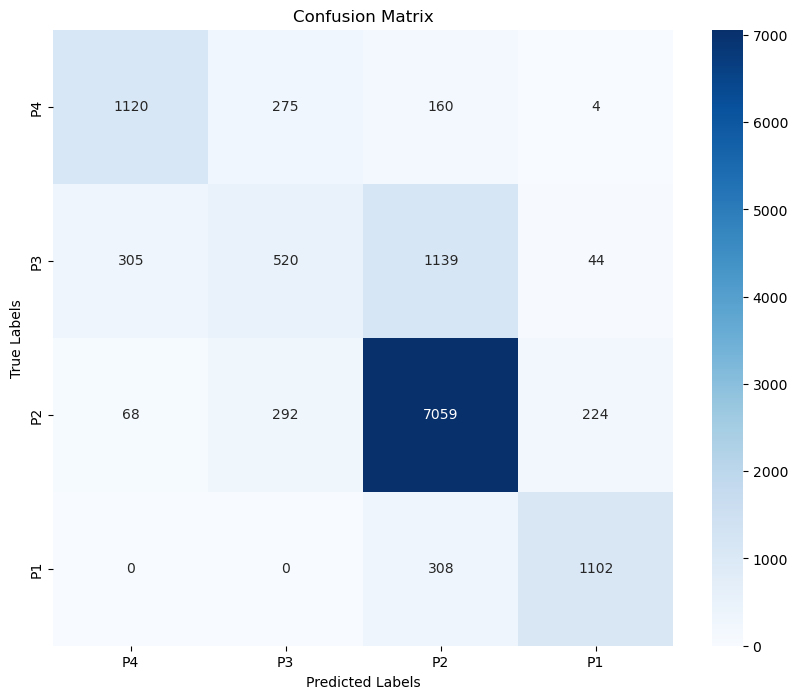

In [56]:
# Assuming you've already made predictions
cm = confusion_matrix(y_test, y_pred)

# Define the labels
labels = ['P4', 'P3', 'P2', 'P1']  # Note: The order is reversed because 0 corresponds to P4, 1 to P3, etc.

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()